In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree 
df=pd.read_csv('C:/Users/PC/Downloads/pandas notebooks/Decision tree/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [3]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [4]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
inputs['Pclass_n']=LabelEncoder().fit_transform(inputs['Pclass'])
inputs['Sex_n']=LabelEncoder().fit_transform(inputs['Sex'])
inputs['Age_n']=LabelEncoder().fit_transform(inputs['Age'])
inputs['Fare_n']=LabelEncoder().fit_transform(inputs['Fare'])

In [7]:
inputs_n=inputs.drop(['Pclass','Sex','Age','Fare'],axis='columns')

In [8]:
inputs_n

,Pclass_n,Sex_n,Age_n,Fare_n
0,2,1,28,18
1,0,0,52,207
2,2,0,34,41
3,0,0,48,189
4,2,1,48,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,39,131
889,0,1,34,153


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
model.score(X_test,y_test)

0.8435754189944135

In [27]:
from sklearn import tree
clf=model.fit(X_test,y_test)

[Text(329.2610294117647, 509.625, 'X[1] <= 0.5\ngini = 0.463\nsamples = 120\nvalue = [114, 65]'),
 Text(141.5514705882353, 441.675, 'X[0] <= 1.5\ngini = 0.32\nsamples = 42\nvalue = [13, 52]'),
 Text(49.23529411764706, 373.725, 'X[2] <= 72.0\ngini = 0.051\nsamples = 24\nvalue = [1, 37]'),
 Text(24.61764705882353, 305.775, 'gini = 0.0\nsamples = 22\nvalue = [0, 35]'),
 Text(73.85294117647058, 305.775, 'X[2] <= 75.5\ngini = 0.444\nsamples = 2\nvalue = [1, 2]'),
 Text(49.23529411764706, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(98.47058823529412, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(233.86764705882354, 373.725, 'X[2] <= 29.5\ngini = 0.494\nsamples = 18\nvalue = [12, 15]'),
 Text(172.3235294117647, 305.775, 'X[2] <= 15.5\ngini = 0.219\nsamples = 6\nvalue = [7, 1]'),
 Text(147.70588235294116, 237.825, 'X[2] <= 7.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(123.08823529411765, 169.875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(172.323529

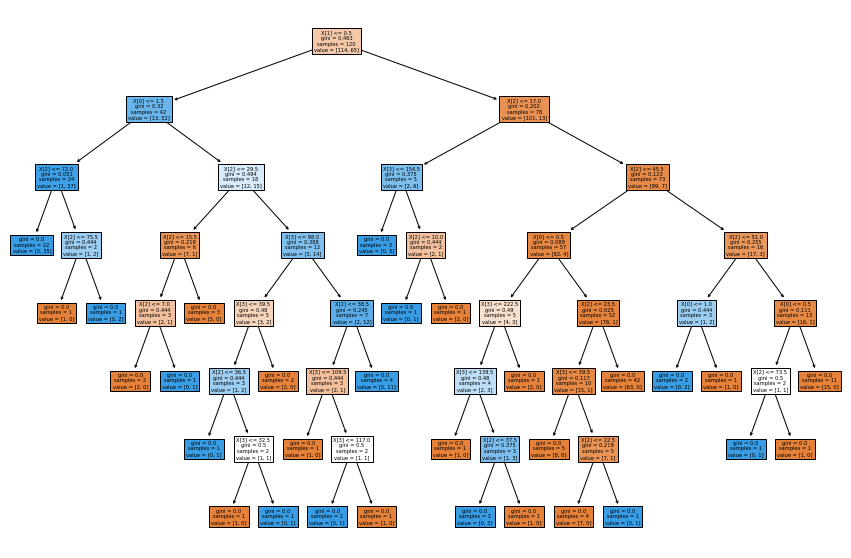

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True)

In [29]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1344808923, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=725729466, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m